In [1]:
def load_namespace():
    import sys
    sys.path.insert(1,f'/wsu/home/gy/gy40/gy4065/hm_jetscapeml_source')#WSU Grid
    sys.path.insert(1,'/content/drive/My Drive/Projects/110_JetscapeMl/hm_jetscapeml_source')#Colab GDrive v1
    sys.path.insert(1,'/content/drive/MyDrive/Projects/110_JetscapeMl/hm_jetscapeml_source')#Colab GDrive v2
    sys.path.insert(1,f'/mnt/g/My Drive/Projects/110_JetscapeMl/hm_jetscapeml_source')#wsl gdrive
    sys.path.insert(1,'G:\\My Drive\\Projects\\110_JetscapeMl\\hm_jetscapeml_source') #Windows GDrive
    sys.path.insert(1,'/home/arsalan/Projects/110_JetscapeML/hm_jetscapeml_source/') #office tower
    
load_namespace()

In [2]:
# Loading/Preparing Environment for simulation
from jet_ml.config import Config
folds=2
epochs=3
dataset_size=1000 #10800000 #1000000
model_name="res_net"
server_name="wsu_grid_v100_cpu_24_mem_256gb"
simulation_name=f"alpha_s_{model_name}_{folds}_fold_{epochs}_epoch_{int(dataset_size/1000)}k_dataset_size_{server_name}"

config=Config(simulation_name=simulation_name)
config.__str__()

2024-10-21 15:33:45.290407: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-21 15:33:45.298008: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-21 15:33:45.307026: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-21 15:33:45.309772: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-21 15:33:45.316435: I tensorflow/core/platform/cpu_feature_guar

Directory /home/arsalan/Projects/110_JetscapeML/hm_jetscapeml_source/models/alpha_s_res_net_2_fold_3_epoch_1k_dataset_size_wsu_grid_v100_cpu_24_mem_256gb created.
Directory /home/arsalan/Projects/110_JetscapeML/hm_jetscapeml_source/reports/alpha_s_res_net_2_fold_3_epoch_1k_dataset_size_wsu_grid_v100_cpu_24_mem_256gb created.
Directory /home/arsalan/Projects/110_JetscapeML/hm_jetscapeml_source/reports/figures/alpha_s_res_net_2_fold_3_epoch_1k_dataset_size_wsu_grid_v100_cpu_24_mem_256gb created.


2024-10-21 15:33:46.341052: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


'Project Root: /home/arsalan/Projects/110_JetscapeML/hm_jetscapeml_source\nData Directory: /home/arsalan/Projects/110_JetscapeML/hm_jetscapeml_source/data\nModels Directory: /home/arsalan/Projects/110_JetscapeML/hm_jetscapeml_source/models\nReports Directory: /home/arsalan/Projects/110_JetscapeML/hm_jetscapeml_source/reports\nFigures Directory: /home/arsalan/Projects/110_JetscapeML/hm_jetscapeml_source/reports/figures\nSimulation Models Directory: /home/arsalan/Projects/110_JetscapeML/hm_jetscapeml_source/models/alpha_s_res_net_2_fold_3_epoch_1k_dataset_size_wsu_grid_v100_cpu_24_mem_256gb\nSimulation Reports Directory: /home/arsalan/Projects/110_JetscapeML/hm_jetscapeml_source/reports/alpha_s_res_net_2_fold_3_epoch_1k_dataset_size_wsu_grid_v100_cpu_24_mem_256gb\nSimulation Figures Directory: /home/arsalan/Projects/110_JetscapeML/hm_jetscapeml_source/reports/figures/alpha_s_res_net_2_fold_3_epoch_1k_dataset_size_wsu_grid_v100_cpu_24_mem_256gb\nEnvironment Details:\n  TensorFlow Version:

In [3]:
from IPython.display import display
# with tf.device("CPU"):
import jet_ml.classifiers.alpha_s.preprocess_dataset as pred
(x,y_raw,y_df)=pred.preprocess_dataset_for_alpha_s(dataset_size)
y_classes=y_df.columns
y=y_df.values
display("y_classes: ",y_classes)
display("y: ",y[:5])
display("y_raw: ",y_raw[:5])

Dataset Preprocessor
Loading the whole dataset
Extract the working column#1 for classification
dataset.x: <class 'numpy.ndarray'> 1024000 (1000, 32, 32)
dataset.y: <class 'numpy.ndarray'> 1000 (1000,)


'y_classes: '

Index(['0.2', '0.3', '0.4'], dtype='object')

'y: '

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0]])

'y_raw: '

array(['0.2', '0.2', '0.2', '0.2', '0.2'], dtype='<U32')

In [4]:
from jet_ml.classifiers.alpha_s.preprocess_dataset import preprocess_dataset_for_resnet

WIDTH = 256
HEIGHT = 256
import tensorflow as tf
with tf.device("/CPU:0"):
    x_resized,y_resized= preprocess_dataset_for_resnet(x,y,WIDTH,HEIGHT)

'x.shape (1000, 32, 32, 1)'

'y.shape (1000, 3)'

'Data is normalized: True'

'x_rgb.shape (1000, 32, 32, 3)'

'x_resized.shape (1000, 256, 256, 3)'

'y_resized.shape (1000, 3, 1)'

In [5]:
if folds==1:
    Display("Folds: ",folds)
    TRAIN_PCT = 0.9
    TRAIN_CUT = int(len(x) * TRAIN_PCT)

    x_df_train_cut = x_resized[0:TRAIN_CUT]
    x_df_validate_cut = x_resized[TRAIN_CUT:]

    y_df_train_cut = y_resized[0:TRAIN_CUT]
    y_df_validate_cut = y_resized[TRAIN_CUT:]


    print(f"Training size: {len(x_df_train_cut)}")
    print(f"Validate size: {len(x_df_validate_cut)}")
    from jet_ml.dataset import create_train_data_generator, create_validation_data_generator
    # Usage
    train_generator = create_train_data_generator(x_df_train_cut, y_df_train_cut)
    val_generator = create_validation_data_generator(x_df_validate_cut, y_df_validate_cut)
    display("train_generator_x: ",train_generator.__next__()[0].shape)
    display("train_generator_y: ",train_generator.__next__()[1].shape)
    display("val_generator_x: ",val_generator.__next__()[0].shape)
    display("val_generator_y: ",val_generator.__next__()[1].shape)
    from jet_ml.models.resnet import build_model

    with tf.device('/GPU:0'):#/GPU:0
        import tensorflow as tf
        # Enable logging of device placement
        tf.debugging.set_log_device_placement(True)
        
        from tensorflow.keras.layers import Input
        input_tensor = Input(shape=(HEIGHT, WIDTH, 3))
        model=build_model(input_tensor,num_classes=3,activation='softmax')
        # model.summary()
        import tensorflow as tf

        from jet_ml.models.helpers import compile_model
        model=compile_model(model)
    # model.summary()

    from jet_ml.models.resnet import train_model
    monitor='val_accuracy' #'val_accuracy' or 'val_loss'
    import tensorflow as tf
    with tf.device('/GPU:0'):#/GPU:0
        train_model(model,train_generator,val_generator,epochs=epochs,monitor=monitor)
    from jet_ml.evaluation import get_accuracy_from_generator
    predictions, accuracy = get_accuracy_from_generator(model=model, data_generator=val_generator)  # or use train_generator

    print("Predicted classes:", predictions)
    print("Accuracy:", accuracy)



In [8]:
if folds !=1:
    from jet_ml.dataset import create_train_data_generator, create_validation_data_generator
    from jet_ml.models.resnet import build_model
    from jet_ml.models.helpers import compile_model
    from jet_ml.models.resnet import train_model
    from jet_ml.evaluation import get_accuracy

    # fold, shuffle, x, y_raw
    import numpy as np
    from sklearn.model_selection import StratifiedKFold
    from sklearn import metrics
    k_fold=StratifiedKFold(folds,shuffle=True,random_state=42)

    out_of_sample_y=[]
    out_of_sample_pred=[]
    folds_accuracy=[]
    epochs_needed = []
    times_taken=[]
    fold=0

    #Must specify y StratifiedKFold for classification
    for train,test in k_fold.split(x,y_raw):
        fold+=1
        print(f"Fold #{fold}")

        x_train=x_resized[train]
        y_train=y_resized[train]
        train_generator = create_train_data_generator(x_train, y_train)
        # Get a batch of data
        x_batch, y_batch = next(train_generator)

        # Get the shape of y (labels) from the batch
        x_batch_shape = x_batch.shape

        print("Shape of x in the batch:", x_batch_shape)
        
        #log train_generator size
        # print(f"train_generator size: {len(train_generator)}")
        x_test=x_resized[test]
        y_test=y_resized[test]
        val_generator = create_validation_data_generator(x_test, y_test)

        # from jet_ml.models import resnet
        from tensorflow.keras.layers import Input
        
        input_tensor = Input(shape=(HEIGHT, WIDTH, 3))
        output_shape=y.shape[1]
        activation='softmax'
        import tensorflow as tf
        with tf.device('GPU:0'):#/GPU:0
            model=build_model(input_tensor,num_classes=output_shape,activation=activation)
            # model.summary()
            model=compile_model(model)
            monitor='val_accuracy' #'val_accuracy' or 'val_loss'
            
            model, history,elapsed_time,stopped_epoch=train_model(model,
                                                                train_generator,val_generator,
                                                                epochs=epochs,monitor=monitor,
                                                                fold=fold)

        from jet_ml.evaluation import get_accuracy_from_generator
        pred, score=get_accuracy_from_generator(model=model, data_generator=val_generator)
        
        print(f"Accuracy: {score}")
        print(f"Fold score (accuracy): {score}")
        folds_accuracy.append(score)

        times_taken.append(elapsed_time)    
        epochs_needed.append(epochs)

        out_of_sample_y.append(y_test)
        out_of_sample_pred.append(pred)


        from jet_ml.evaluation import store_out_of_sample_y_and_predictions
        # convert out_of_sample_y from (1000, 3, 1) to (1000, 3)
        display("out_of_sample_y.shape: ",np.array(out_of_sample_y).shape)
        out_of_sample_y_squeezed=np.squeeze(out_of_sample_y,axis=1)
        store_out_of_sample_y_and_predictions(y_df,out_of_sample_y_squeezed,out_of_sample_pred,y_classes,fold=fold)
        

        from jet_ml.evaluation import save_training_history
        save_training_history(history=history,fold=fold)

        from jet_ml.evaluation import plot_training_history
        plot_training_history(history=history,fold=fold)

        from jet_ml.evaluation import save_training_stats
        save_training_stats(accuracies=folds_accuracy,
                            epochs_needed=epochs_needed,
                            times_taken=times_taken)



Fold #1
Shape of x in the batch: (32, 256, 256, 3)
Epoch 1/3


/home/arsalan/miniconda3/envs/tensorflow/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.2369 - loss: 3.9827
Epoch 1: val_accuracy improved from -inf to 0.00000, saving model to /home/arsalan/Projects/110_JetscapeML/hm_jetscapeml_source/models/alpha_s_res_net_2_fold_3_epoch_1k_dataset_size_wsu_grid_v100_cpu_24_mem_256gb/ResNet50_fold_1_model.keras
15/15 ━━━━━━━━━━━━━━━━━━━━ 79s 4s/step - accuracy: 0.2357 - loss: 4.0050 - val_accuracy: 0.0000e+00 - val_loss: 1.1655 - learning_rate: 0.0010
Epoch 2/3
 1/15 ━━━━━━━━━━━━━━━━━━━━ 52s 4s/step - accuracy: 0.6667 - loss: 2.1358

/home/arsalan/miniconda3/envs/tensorflow/lib/python3.12/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)



Epoch 2: val_accuracy did not improve from 0.00000
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - accuracy: 0.6667 - loss: 2.1358 - val_accuracy: 0.0000e+00 - val_loss: 1.0692 - learning_rate: 0.0010
Epoch 3/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.6197 - loss: 1.7469
Epoch 3: val_accuracy did not improve from 0.00000
15/15 ━━━━━━━━━━━━━━━━━━━━ 67s 5s/step - accuracy: 0.6181 - loss: 1.7371 - val_accuracy: 0.0000e+00 - val_loss: 23.5405 - learning_rate: 0.0010
Restoring model weights from the end of the best epoch: 1.
Elpased time: 0:02:30
batch_index: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
batch_index: 2
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 818ms/step
batch_index: 3
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 820ms/step
batch_index: 4
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 802ms/step
batch_index: 5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 892ms/step
batch_index: 6
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 830ms/step
batch_index: 7
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 805ms/step
batch_index: 8
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 826ms/step
batch_index: 9
1/

ValueError: cannot select an axis to squeeze out which has size not equal to one

In [ ]:
# Build the oos prediction list and calculate the error.
out_of_sample_y=np.concatenate(out_of_sample_y)
display("out_of_sample_y.shape: ", out_of_sample_y.shape)
display("out_of_sample_y: ",out_of_sample_y[:5])

out_of_sample_pred=np.concatenate(out_of_sample_pred)

# convert the out_of_sample_y to a 1D array
out_of_sample_y_compare=np.argmax(out_of_sample_y,axis=1)# For accuracy and confusion matrix calculation
display("out_of_sample_compare.shape: ",out_of_sample_y_compare.shape)
display("out_of_sample_compare" ,out_of_sample_y_compare[:5])


In [6]:
from jet_ml.evaluation import calculate_accuracy
calculate_accuracy(out_of_sample_y_compare,out_of_sample_pred)

0.333

In [7]:
from jet_ml.evaluation import store_out_of_sample_y_and_predictions
# convert out_of_sample_y from (1000, 3, 1) to (1000, 3)
out_of_sample_y_squeezed=np.squeeze(out_of_sample_y,axis=2)
store_out_of_sample_y_and_predictions(y_df,out_of_sample_y_squeezed,out_of_sample_pred,y_classes)

Confusion matrix, without normalization
[[167 168   0]
 [167 166   0]
 [166 166   0]]
Normalized confusion matrix
[[0.5 0.5 0. ]
 [0.5 0.5 0. ]
 [0.5 0.5 0. ]]


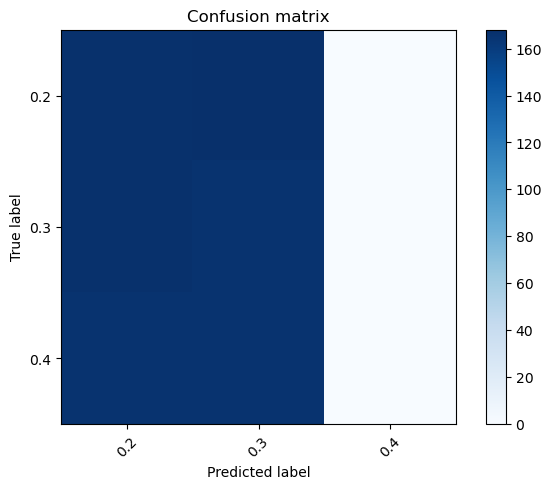

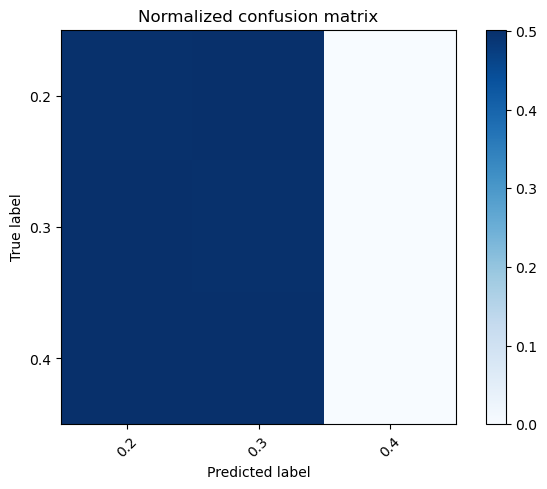

In [9]:
from jet_ml.evaluation import calculate_confusion_matrix
calculate_confusion_matrix(out_of_sample_y_compare, out_of_sample_pred,y_classes)